In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

**Data Collection and Analysis**

In [2]:
df=pd.read_csv("parkinsons.csv")

In [3]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
pd.set_option("display.max_columns",24)
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
df.shape #number of rows and columns

(195, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.isnull().any() #to check if any null values are present

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

**getting statistical measures/analysis**

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

0--> Healthy ,
1-->Parkinson's disease


In [10]:
X=df.drop(columns=['name','status'],axis=1)
y=df['status']

In [11]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(136, 22) (59, 22) (136,) (59,)


In [15]:
scaler=StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [19]:

# Assuming X is your feature DataFrame and y is the target
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
18           spread1    0.127490
21               PPE    0.119246
0        MDVP:Fo(Hz)    0.101098
2       MDVP:Flo(Hz)    0.058390
19           spread2    0.053361
1       MDVP:Fhi(Hz)    0.046669
12          MDVP:APQ    0.044716
20                D2    0.041824
5           MDVP:RAP    0.040550
14               NHR    0.038344
11      Shimmer:APQ5    0.037662
16              RPDE    0.034869
13       Shimmer:DDA    0.031395
17               DFA    0.030517
7         Jitter:DDP    0.030171
8       MDVP:Shimmer    0.026922
4   MDVP:Jitter(Abs)    0.026401
10      Shimmer:APQ3    0.024188
15               HNR    0.023369
9   MDVP:Shimmer(dB)    0.021842
6           MDVP:PPQ    0.020700
3     MDVP:Jitter(%)    0.020275


**Model 1:-**

In [20]:
model1=SVC()

In [21]:
model1.fit(X_train,y_train)

SVC()

**prediction on test data**

In [22]:
y_pred=model1.predict(X_test)

**prediction on train data**

In [23]:
y_pred_train=model1.predict(X_train)

**accuracy score for training data**

In [24]:
print("accuracy_score for train data:-",accuracy_score(y_train,y_pred_train))

accuracy_score for train data:- 0.8823529411764706


**accuracy score for test data**

In [25]:
print("accuracy_score for test data:-",accuracy_score(y_test,y_pred))

accuracy_score for test data:- 0.8813559322033898


**classification_report:**

In [26]:
print("classification_report:-\n",classification_report(y_test,y_pred))

classification_report:-
               precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.86      1.00      0.93        44

    accuracy                           0.88        59
   macro avg       0.93      0.77      0.81        59
weighted avg       0.90      0.88      0.87        59



**confusion_matrix:**

In [27]:
print("confusion_matrix:-\n",(confusion_matrix(y_test,y_pred)))

confusion_matrix:-
 [[ 8  7]
 [ 0 44]]


**model2:-Decision tree classifier**

In [28]:
model2=DecisionTreeClassifier()

**hyperparameter tunning**

In [29]:
param={'criterion': ["gini", "entropy", "log_loss"],
     'splitter':["best", "random"],
     'max_depth':[1,2,3,None],
      'min_samples_split':[1,2,3]}
grid=GridSearchCV(model2,param_grid=param,scoring='accuracy',cv=5)

In [30]:
grid.fit(X_train,y_train)

C:\Users\kumbhar sakshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kumbhar sakshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kumbhar sakshi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\kumbhar sakshi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\U

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, None],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

**getting best parameters selected by hyperparameter tunning**

In [31]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 2,
 'splitter': 'random'}

**Prediction on training data:-**

In [32]:
y_pred_train_model2=grid.predict(X_train)

**accuracy_score for training data:-**

In [33]:
print("accuracy_score for training data:-",accuracy_score(y_train,y_pred_train_model2))

accuracy_score for training data:- 1.0


**Prediction on test data:-**

In [34]:
y_pred1=grid.predict(X_test)

**accuracy_score for test data:-**

In [35]:
print("accuracy_score for test data:-",accuracy_score(y_test,y_pred1))

accuracy_score for test data:- 0.9152542372881356


**Classification report for model2:-**

In [36]:
print("classification_report:-\n",classification_report(y_test,y_pred1))

classification_report:-
               precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      0.98      0.95        44

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.88        59
weighted avg       0.92      0.92      0.91        59



In [37]:
dt_model=DecisionTreeClassifier(**grid.best_params_)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

[Text(0.6451612903225806, 0.9583333333333334, 'x[21] <= -0.065\nentropy = 0.799\nsamples = 136\nvalue = [33, 103]'),
 Text(0.41935483870967744, 0.875, 'x[18] <= -1.233\nentropy = 0.978\nsamples = 75\nvalue = [31, 44]'),
 Text(0.2903225806451613, 0.7916666666666666, 'x[19] <= 0.114\nentropy = 0.391\nsamples = 13\nvalue = [12, 1]'),
 Text(0.22580645161290322, 0.7083333333333334, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.3548387096774194, 0.7083333333333334, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5483870967741935, 0.7916666666666666, 'x[21] <= -0.175\nentropy = 0.889\nsamples = 62\nvalue = [19, 43]'),
 Text(0.4838709677419355, 0.7083333333333334, 'x[7] <= -0.456\nentropy = 0.912\nsamples = 58\nvalue = [19, 39]'),
 Text(0.25806451612903225, 0.625, 'x[20] <= -0.315\nentropy = 0.977\nsamples = 34\nvalue = [14, 20]'),
 Text(0.12903225806451613, 0.5416666666666666, 'x[20] <= -1.106\nentropy = 0.995\nsamples = 24\nvalue = [13, 11]'),
 Text(0.06451612903225806, 0.4

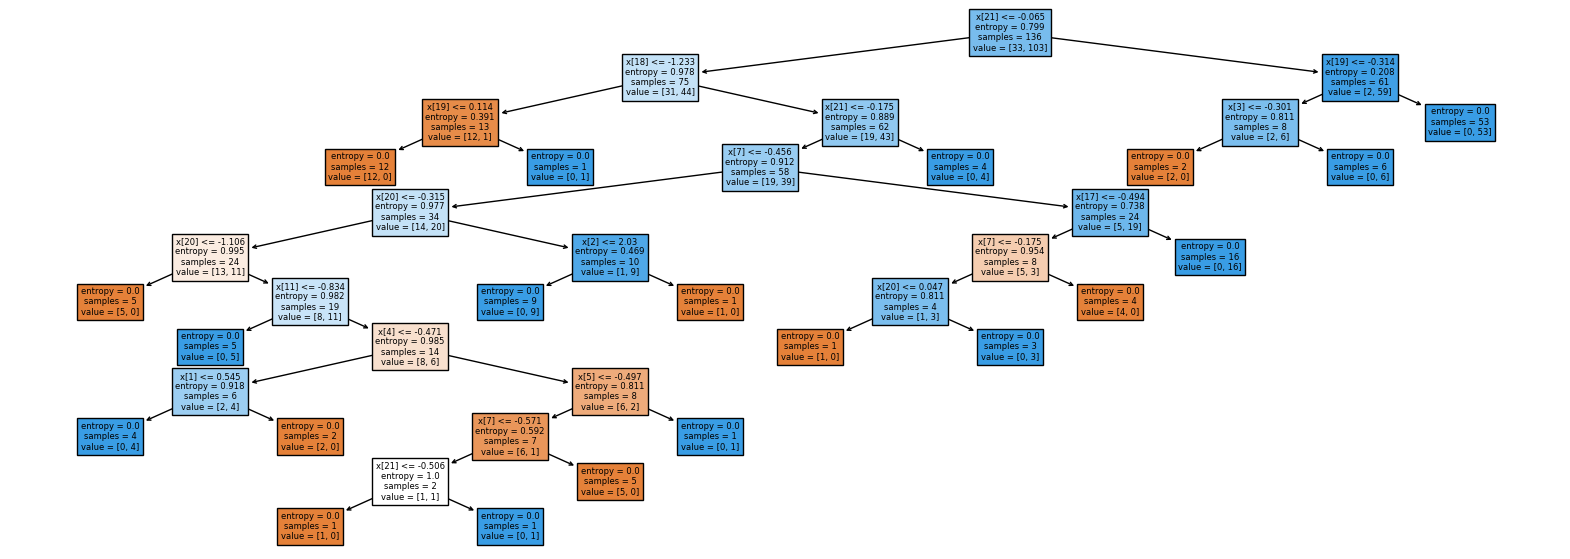

In [38]:
from sklearn import tree
plt.figure(figsize=(20,7))
tree.plot_tree(dt_model,filled=True)

**Model3**

In [39]:
model3=LogisticRegression()

In [40]:
model3.fit(X_train,y_train)

LogisticRegression()

**Prediction on test data**

In [41]:
y_pred_model3=model3.predict(X_test)

**Accuracy for test data**

In [42]:
print("accuracy_score for test data:-",accuracy_score(y_test,y_pred_model3))

accuracy_score for test data:- 0.864406779661017


**Prediction on training data**

In [43]:
y_pred_model3_train=model3.predict(X_train)

**Accuracy for training data**

In [44]:
print("accuracy_score for training data:-",accuracy_score(y_train,y_pred_model3_train))

accuracy_score for training data:- 0.8823529411764706


**Classification report for model3:-**

In [45]:
print("classification_report:-\n",classification_report(y_test,y_pred_model3))

classification_report:-
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



**Model4:-**

In [46]:
model4=VotingClassifier(
   [ ('M1',model2),
    ('M2',model3)],
voting='soft')

In [47]:
model4.fit(X_train,y_train)

VotingClassifier(estimators=[('M1', DecisionTreeClassifier()),
                             ('M2', LogisticRegression())],
                 voting='soft')

**Prediction on test data**

In [48]:
y_pred4=model4.predict(X_test)

**Accuracy score for test data**

In [49]:
print("accuracy_score for test data:-",accuracy_score(y_test,y_pred4))

accuracy_score for test data:- 0.864406779661017


**Prediction on training data**

In [50]:
y_pred4_train=model4.predict(X_train)

**Accuracy on training data**

In [51]:
print("accuracy_score for test data:-",accuracy_score(y_train,y_pred4_train))

accuracy_score for test data:- 1.0


**Classification report**

In [52]:
print("classification_report:-\n",classification_report(y_test,y_pred4))

classification_report:-
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.91      0.91      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.86      0.86      0.86        59



In [53]:
data={"SVC":0.8813559322033898,"DecisionTree":0.8983050847457628,'LogisticRegression':0.864406779661017,'VotingClassifier': 0.9322033898305084}
result=pd.DataFrame(data,index=["accuracy_score"])

In [54]:
result

,SVC,DecisionTree,LogisticRegression,VotingClassifier
accuracy_score,0.881356,0.898305,0.864407,0.932203


In [55]:
# Assuming 'model' is your trained model
with open("parkinsons_model.pkl", "wb") as f:
    pickle.dump(model4, f)
    
with open("parkinsons_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)